# 逻辑回归  
响应变量描述了结果是正向的概率。
如果响应变量等于或者超出了一个区分阈值，则被预测为正向类，否则被预测为负向类

# 垃圾邮件过滤
 

In [2]:
# 导入文件
import pandas as pd
df = pd.read_csv("D:\Program Files\python-exercise-\《scikit-learn 机器学习》\学习代码\SMSSpamCollection.csv", delimiter='\t', header=None)
print(df.head())

      0                                                  1
0   ham  Go until jurong point, crazy.. Available only ...
1   ham                      Ok lar... Joking wif u oni...
2  spam  Free entry in 2 a wkly comp to win FA Cup fina...
3   ham  U dun say so early hor... U c already then say...
4   ham  Nah I don't think he goes to usf, he lives aro...


In [3]:
# 分别打印垃圾邮件（spam）和非垃圾邮件（ham）的数量
print('Number of spam messages: %s' % df[df[0] == 'spam'][0].count())  # 打印垃圾短信spam的数量
print('number of ham message: %s' % df[df[0] == 'ham'][0].count())  # 打印非垃圾短信的数量
# df[0] == 'spam'：这部分代码会在数据框 df 的第一列中寻找所有值为 ‘spam’ 的行，并返回一个布尔型的 Series，其中 ‘spam’ 对应的行为 True，其他行为 False。

Number of spam messages: 747
number of ham message: 4825


In [6]:
# 训练模型

import numpy as np
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model._logistic import LogisticRegression
from sklearn.model_selection import train_test_split, cross_val_score

X = df[1].values
y = df[0].values
X_train_raw, X_test_raw, y_train, y_test = train_test_split(X,y)

# 用来学习邮件的(tf*idf)规律
vectorizer = TfidfVectorizer()  
X_train = vectorizer.fit_transform(X_train_raw)
X_test = vectorizer.transform(X_test_raw)

classifier = LogisticRegression()
classifier.fit(X_train,y_train)
predictions = classifier.predict(X_test)

for i,prediction in enumerate(predictions[:5]):
    print('Predicted: %s, message: %s' %(prediction,X_test_raw[i]))
    

Predicted: ham, message: Sorry, I'll call later
Predicted: ham, message: Ü still got lessons?  Ü in sch?
Predicted: spam, message: FREE MESSAGE Activate your 500 FREE Text Messages by replying to this message with the word FREE For terms & conditions, visit www.07781482378.com
Predicted: ham, message: Yup. Thk of u oso boring wat.
Predicted: ham, message: We took hooch for a walk toaday and i fell over! Splat! Grazed my knees and everything! Should have stayed at home! See you tomorrow! 


# 二元分类性能指标 


## 混淆矩阵（or列联表） 可以对真假阴阳可视化  
行是实例的真实类，列是实例的预测类


[[4 1]
 [2 3]]


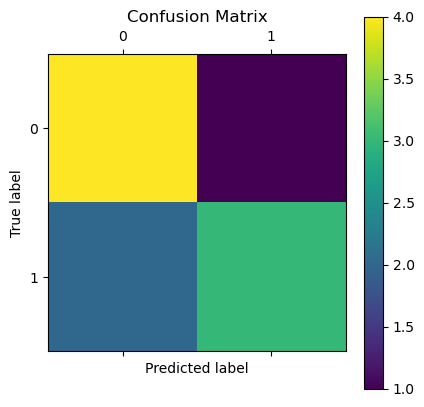

In [13]:
# 展示混淆矩阵
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt 

y_test = [0,0,0,0,0,1,1,1,1,1]
y_pred = [0,1,0,0,0,0,0,1,1,1]

cfs_matrix = confusion_matrix(y_test, y_pred)
print(cfs_matrix)  # 4真阴，1假阳，2假阴，3真阳

plt.matshow(cfs_matrix)  # 将混淆矩阵可视化为一个热图
plt.title('Confusion Matrix')
plt.colorbar()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

## 准确率(Accuracy)
LogisticRegression.soce()方法使用准确率来给测试集的标签进行预测和打分

In [27]:
# 本处使用交叉验证
import numpy as np
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model._logistic import LogisticRegression
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

df = pd.read_csv("D:\Program Files\python-exercise-\《scikit-learn 机器学习》\学习代码\sms.csv")
X_train_raw, X_test_raw, y_train, y_test = train_test_split(df['message'],df['label'],random_state=11)

# 用来学习邮件的(tf*idf)规律
vectorizer = TfidfVectorizer()
X_train = vectorizer.fit_transform(X_train_raw)
X_test = vectorizer.transform(X_test_raw)

# 建立模型
classifier = LogisticRegression()
classifier.fit(X_train,y_train)
scores = cross_val_score(classifier, X_train, y_train, cv=5)
print('Accuracies %s' %scores)
print('Mean accuracy: %s' % np.mean(scores))

Accuracies [0.95215311 0.95454545 0.96291866 0.96052632 0.94856459]
Mean accuracy: 0.9557416267942583


##  精确率（Precision）和召回率(Recall)   
精确率是阳性结果预测正确的比例  
召回率是真实的阳性实例被分类器辨认出的比例

In [28]:
precisions = cross_val_score(classifier, X_train, y_train ,cv=5, scoring='precision')
print('Precision: %s' % np.mean(precisions))
recalls = cross_val_score(classifier, X_train, y_train ,cv=5, scoring='recall')
print('Recall:%s' % np.mean(recalls))

Precision: 0.9924976942419154
Recall:0.6800807328054649


## 计算F1值 
F1值是精确率和召回率的调和平均值(会对精确率和召回率不平衡的分类器进行惩罚)  
达到完美精确率和召回率模型的F1得分为1   
**f0.5** 和 **f2** 分别偏向精确率和召回率

In [29]:
f1s = cross_val_score(classifier,X_train,y_train,cv=5,scoring='f1')
print('F1 score: %s' %np.mean(f1s))

F1 score: 0.8063416255334556


## ROC AUC   
**受度者操作特征（ROC）曲线**描绘了分类器 召回率和衰退之间的关系（衰退/假阳性率：假阳性数量除以所有阴性数量）   
**AUC**；是ROC曲线以下的部分，将ROC曲线归纳为一个用来标示分类器预计性能的指

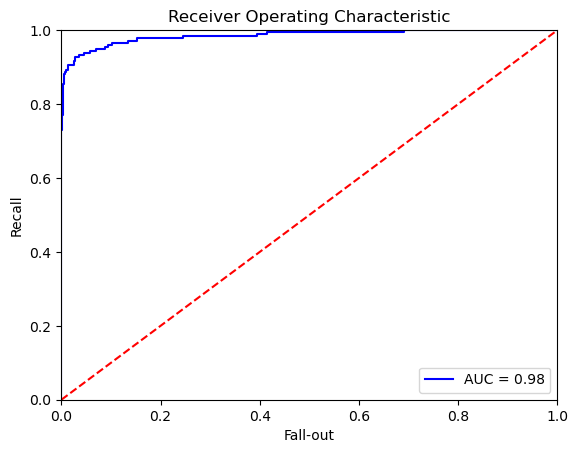

In [40]:
# 绘制垃圾短信分类器的ROC曲线
predictions = classifier.predict_proba(X_test)
false_positive_rate, recall, thresholds = roc_curve(y_test, predictions[:,1])
roc_auc = auc(false_positive_rate, recall)

plt.title('Receiver Operating Characteristic')
plt.plot(false_positive_rate, recall, 'b', label='AUC = %0.2f' %roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.0])
plt.ylabel('Recall')
plt.xlabel('Fall-out')
plt.show()